# **PROJET PYTHON POUR LA DATA SCIENCE : Machine Learning vs Black-Scholes**
##        ***Les algorithmes de machine learning prédiraient-ils mieux le cours des actions financières que le célèbre modèle économétrique Black-Scholes?***

## **Auteurs:** 
### **<center> NGUEMOGNE Sandra, Rougier Antoine</center>**

####     L'objectif de ce notebook est de présenter le projet que nous avons effectué dans le cadre de l'unité d'enseignement Python pour la data science dispensée à l'ENSAE. Ce projet a été élaboré de manière libre et comporte, comme attendu, un jeu de données récupéré et traité, une partie visualisation et une partie modélisation. La problématique qui y est traité a pour objectif majeur d'etre d'une grande utilité pour les investisseurs fianciers qui voudraient se lancer sur le marché boursier.

# **Plan du travail**

## **A) Problématique**
## **B) Installations préalables et importation des modules**
## **I. Récupération, visualisation et traitement de données**
## **II. Analyses descriptives et représentations graphiques**
## **III. Modélisation**
### **III.1 Algorithmes de Machine Learning**
#### **a) Regression linéaire**
#### **b) Modèle SVM** 
### **III.2 Modèle Black-Scholes**
## **C) Ce qu'on retient**

## **A) Problématique**
### Ce projet s'articule autour de la problématique suivante :

#### ***<center>Lequel des algorithmes de Machine Learning et du modèle économétrique de Black-Scholes prédit-il le mieux le cours de l'action de la compagnie d'Assurance AXA?</center>***

## **B) Installations préalables et importation des modules** 

Avant d'exécuter ce code, veuillez procéder aux installations et importations des modules nécessaires à son bon fonctionnement: exécutez la cellule ci-dessous.

In [1]:
!pip install yfinance
!pip install matplotlib
import yfinance as yahooFinance
import datetime
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import check_X_y
from sklearn import svm
import sklearn.metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## **I. Récupération, visualisation et traitement de données** 

Dans cette partie, nous récupérons et traitons les données portant sur le cours de l'action de la compagnie d'Assurance AXA. Nous avons choisi de  les récupérer directement sur le site  de référence: ***Yahoo Finance***. Nous récupérons ainsi les données allant du 1er janvier 2019 au 31 décembre de la meme annnée. Pour cela nous avons eu besoin d'un identifiant communément appélé ****ticker***, celui d'AXA correspondant ainsi à 
**CS.PA**.
Comme vous pourez le voir en excutant les prochaines cellules, notre jeu de données est un ensemble de 255 observations et 7 variables: ***Open, High, Low, Close, Volume, Dividends et Stock Splits.*** Les 2 dernières variables ne nous seront pas d'un intéret particulier, raison pour laquelle nous allons les supprimer en chemin.
Pour une journée donnée: 
+ La varialble ***Open (respectivement Close)*** correspond au prix, au matin (respectivement dans la soirée/en fin de journée) de l'action d'AXA sur le marché boursier.
- La variable ***High (respectivement Low)*** correspond au prix le plus élevé (respectivement le plus bas) qu'a atteind la valeur de l'action dans la journée.
+ La variable ***Volume*** représente le nombre d'actions échangées sur le marché dans la journée.

#### ***Récupération***

In [2]:
start_Date = datetime.datetime(2019, 1, 1) #Précise la date de début
end_Date = datetime.datetime(2019, 12, 31) #Précise la date de fin

GetAXAInfo = yahooFinance.Ticker("CS.PA") #Localise les données du cours de l'action d'AXA
df_init=GetAXAInfo.history(start=start_Date,end=end_Date) #parmi ces données, on récupère celles correspondant aux dates qui nous interessent

#### ***Visualisation et traitement de données*** 

In [3]:
print(len(df_init)) #  affiche le nombre d'observations
print(df_init.columns) # affiche la liste des variables
df_init.head() # Affiche les 5 premières lignes du dataframe pour un apercu fluide

255
Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02 00:00:00+01:00,13.595197,13.738303,13.455009,13.731002,8028529,0.0,0.0
2019-01-03 00:00:00+01:00,13.599575,13.836141,13.589353,13.617099,6583413,0.0,0.0
2019-01-04 00:00:00+01:00,13.720778,14.087309,13.666748,14.044960,11675578,0.0,0.0
2019-01-07 00:00:00+01:00,14.078548,14.150101,13.900394,13.982169,7530045,0.0,0.0
2019-01-08 00:00:00+01:00,14.027438,14.218735,13.988011,14.034739,7314687,0.0,0.0


On remarque que les dates peuvent poser un problème dans notre modélisation, car elles sont converties sous le format Unix, et que les heures ne nous intérèssent pas particulière dans notre projet. Nous allons d'abord convertir ces dates dans un format qui ne nous posera pas de problème. De plus, en visualisant les valeurs minimales et maximales des 2 dernièrres colonnes, nous remarquons que la colonne ***Dividends*** n'est pas toujours nulle contrairement à ce qu'on pouvait penser. Tandis que ***stock splits l'est***. Dans la suite de notre projet, nous n'utiliserons plus ces colonnes car elle ne sont pas pertinentes donc nous décidons de les supprimer. 

In [4]:
#Formatage des dates
df_init = df_init.reset_index()
df_init["Date"] = df_init["Date"].dt.strftime('%Y-%m-%d')
df_init = df_init.set_index('Date')
df_init.head()


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-01-02,13.595197,13.738303,13.455009,13.731002,8028529,0.0,0.0
2019-01-03,13.599575,13.836141,13.589353,13.617099,6583413,0.0,0.0
2019-01-04,13.720778,14.087309,13.666748,14.044960,11675578,0.0,0.0
2019-01-07,14.078548,14.150101,13.900394,13.982169,7530045,0.0,0.0
2019-01-08,14.027438,14.218735,13.988011,14.034739,7314687,0.0,0.0


In [5]:
#Visualisation des maxima des deux dernières colonnes
print(max(df_init['Stock Splits']))
print(max(df_init['Dividends']))

#Suppression des 2 dernières colonnes 
df_init = df_init.drop(columns =  ["Dividends","Stock Splits"])
df_init.head()

0.0
1.34


,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,13.595197,13.738303,13.455009,13.731002,8028529
2019-01-03,13.599575,13.836141,13.589353,13.617099,6583413
2019-01-04,13.720778,14.087309,13.666748,14.044960,11675578
2019-01-07,14.078548,14.150101,13.900394,13.982169,7530045
2019-01-08,14.027438,14.218735,13.988011,14.034739,7314687


Pour resumer et/ou compléter les visualitions ci-dessous, nous allons utiliser la fonction ***describe*** qui nous donnera davantage de caractéristiques sur les variables de la base.

In [6]:
df_init.describe()

,Open,High,Low,Close,Volume
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02
mean,17.233804,17.364001,17.126566,17.259327,6.180807e+06
std,1.427426,1.419908,1.425413,1.425055,2.229986e+06
min,13.595197,13.738303,13.455009,13.617099,0.000000e+00
25%,16.391628,16.570513,16.289408,16.439543,4.741434e+06
50%,17.344898,17.443028,17.182396,17.333292,5.805304e+06
75%,18.283140,18.428227,18.182545,18.312158,7.141672e+06
max,19.646976,19.685667,19.546381,19.658583,1.826625e+07


Le tableau que nous obtenons à partir de la commande describe nous donne de facon sommaire les caractéristiques des variables de notre base. 
Nous constatons que le prix moyen de l'action en début de journée est de 17.23 avec un écart-type de 1.42, tandis-que'en fin de journée il est de 17.25 avec quasiment le meme écart-type. La valeur minimale de la variable ***Low*** et la vauleur maximale de la variable ***High*** nous permettent de dire que durant l'année, la valeur la plus petite atteinte par le prix de l'action est de 13.45 et la valeur maximale qu'il peut atteindre est de 19.68. 
D'après le deuxième quantile (50%) nous pouvons dire que Pour la moitié de l'ensemble des jours de l'année on a des prix de fin de période en dessous de 17.33 et pour le quart de ces jours (25%), on a des prix de fin de période inférieurs à 16.43. Nous nous limitons à la variable ***Close*** pour cette interprétation car elle est au centre de nos prochaines modélisations.

## **II. Analyses descriptives et représentations graphiques**

Nous allons d'abord regarder le graphique des prix de l'action Axa sur l'année 2019. Puis nous analyserons le volume échangé sur chaque mois, pour voir s'il n'existerait pas une corrélation entre le volume échangé et le prix de l'action. 

Text(0.5, 0, 'Temps')

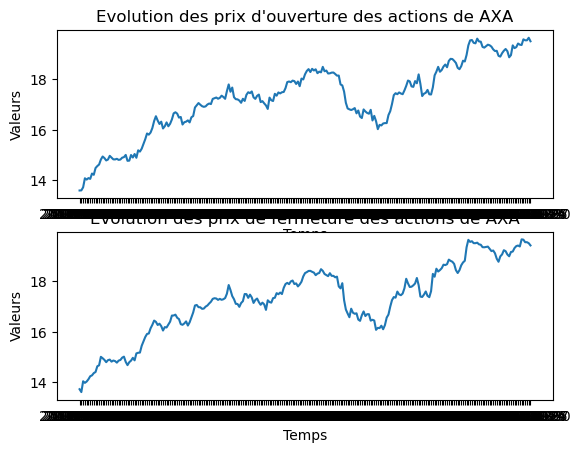

In [7]:
df2 = df_init.copy()
new_df = df2[['Open']]
new_df2 = df2[['Close']]
plt.subplot(211)
plt.plot(new_df)
plt.title("Evolution des prix d'ouverture des actions de AXA")
plt.ylabel("Valeurs")
plt.xlabel("Temps")

plt.subplot(212)
plt.plot(new_df2)
plt.title("Evolution des prix de fermeture des actions de AXA")
plt.ylabel("Valeurs")
plt.xlabel("Temps")

Nous voyons sur les graphiques ci-dessus que les prix croissent à un certains rythme et que qu'il n'y a pas d'incohérence dans nos données pour les prix d'ouverture. Nous n'avons pas de valeur abérante qui attirerait particulièrement l'attention. Nous concluons alors que nous pouvons utiliser cette base de donnée pour faire notre modèle.

Par la suite (prochains grapfiques), nous avons aussi représenté un histogramme qui nous montre le nombre de transaction par mois de l'action AXA pour voir si il y a une évolution. On remarque alors que les volumes échangés pendant cette année 2019 restent relativement similaires pour chaque mois, nous ne voyons pas d'écart significatif au cours de cette période. Cela se confirme par le diagramme circulaire juste en-bas où on remarque que les parts correspondant à chaque mois ont quaisiment la même surface.
 

/tmp/ipykernel_35918/1733144262.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sums = df_grouped.sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])


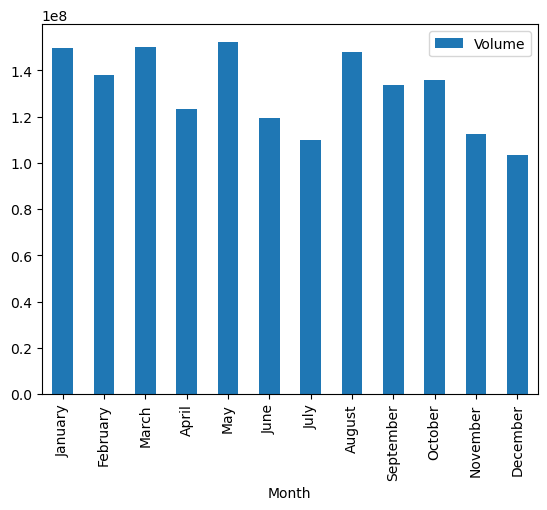

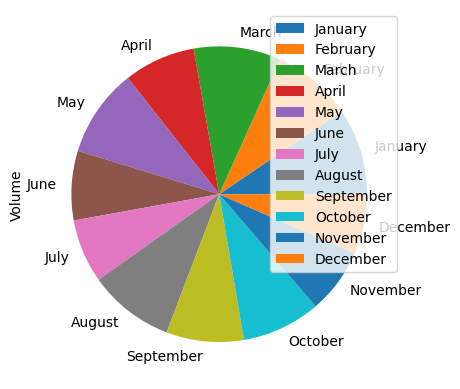

In [8]:
new_df = df2[['Volume']]
new_df
new_df = new_df.reset_index()
new_df['Month'] = pd.to_datetime(new_df['Date']).dt.strftime('%B')
df_grouped = new_df.groupby(new_df['Month'])


#for key, item in df_grouped:
#    print(key)
#    print(df_grouped.get_group(key))


sums = df_grouped.sum().reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
sums
sums.plot.bar()
plt.show()

sums.plot.pie(subplots=True)
plt.show()



En ce qui concerne les corrélations éventuelles entre les variables hors mis la variable ***Close*** qui est la variable que l'on cherche à expliquer dans ce travail, nous voyons une corrélation négative entre le prix d'ouverture et les volumes échangés. Nous pouvions nous attendre à ce résultat en pensant à la loi de l'offre et de la demande pour fixer un prix sur en marché. Donc, pas d'anomalie pour l'instant. Nous pouvons aussi constater que le prix de l'action à l'ouverture est fortement correlé positivement aux valeurs minimale et maximale que le prix atteind dans la journée.

In [9]:
#Matrice des correlations sans la variable à expliquer
df2 = df2.drop(columns =  ["Close"]) #supression de la variable à expliquer dans la base clonée
df2.corr() #affichage de la matrice des correlations

,Open,High,Low,Volume
Open,1.000000,0.997609,0.997896,-0.247450
High,0.997609,1.000000,0.997793,-0.221447
Low,0.997896,0.997793,1.000000,-0.258983
Volume,-0.247450,-0.221447,-0.258983,1.000000


## **III. Modélisation**

A présent nous passons à la partie modélisation de notre travail. Rappellons que notre variable dépendante (à expliquer) est Close qui représente le prix de l'action en fin de journée. **Pour les interprétations des indicateurs, on les fera sur la base d'un seuil de 0.55 à partir duquel on pourra conclure.**

### **III.1 Algorithmes de Machine Learning**
#### **a) Regression multilinéaire**

On commence par faire un modèle de prédiction en s'appuyant uniquement sur la valeur des prix d'ouverture de l'action pour prédire le prix de fermeture de la journée. Nous allons utiliser scikit-learn pour cette modélisation. 

On remarque ici que les courbes vertes et grises se chevauchent assez régulièrement, ce qui montrent que la régression est possible.

Mais nous voulons voir si nous ne pouvons pas aller plus loin dans cette modélisation en rajoutant une nouvelle variable qui prendrait en compte les prix de fermeture de la veille. Nous allons donc créer cette nouvelle colonne dans notre tableau pour faire la modélisation.

In [ ]:
dec=df_init["Close"].shift(1)
df_init= df_init.assign(Close_veille=dec)
df_init.head()

###### ***Modélisation en ajoutant la variable que l'on vient de créer***

In [ ]:
#On fait alors une régression avec commes variables explicatives les prix d'ouverture et de fermeture la veille
X = df_init[['Open', 'Close_veille']]
Y = df_init[['Close']]
X = X[1:len(X)]
Y = Y[1:len(Y)]



#On définit l'échantillon des tests, pour cela il nous faut une proportion de prélèvement des données pour les tests; on la note p
p = int((2/3)*len(X))
X_train = X[:p]
Y_train = Y[:p]
X_test = X[p:]
Y_test = Y[p:]

#On passe désormais à l'entrainement et la prédiction 
regr = linear_model.LinearRegression()
regr.fit(X_train, Y_train)
print(regr.coef_)

y_pred = regr.predict(X_test)
plt.plot(y_pred, color='green')
plt.plot(Y_test, color='gray')
plt.title("Prédiction du cours de l'action AXA")

print("Mean squared error: %.2f" % mean_squared_error(Y_test, y_pred))
print("Coefficient of determination: %.2f" % r2_score(Y_test, y_pred))

#### **b) Modèle SVM**

Dans cette section, il est question de mettre en oeuvre un modèle SVM (Support Vector Machine ou "machine à vecteurs de support"): on cherche toujours à prédire ***Close*** en fonction de ***Open*** et de ***Close_veille***. Nous allons utiliser une approche différente des précédentes afin d'enrichir davantage notre travail. Pour cela, nous définissons une base regroupant les variables dépendantes et normalisons les données et nous redéfinissons la base d'entrainement. La normalisation nous sera utile pour un meilleur rendu ici et le sera encore plus lors de l'implémentation du modèle **B&S (Black-Scholes)** tout à l'heure, car elle permet de centrer les données autour de zéro et par la meme occasion de réduire la variance des caractéristiques potentielles. Pour ne par surcharger le travail, nous allons en profiter pour créer les variables nécessaires à la section B&S avant la défintiion de l'échantillon d'entrainement, notament la variable des log-rendements du cours de l'action en question, tres souvent privilégiée en finance. *La mention BS sur les variables d'entrainement signifie juste que ce sont les memes variables qui seront utilisées pour le modèle B&S, donc ne pas y faire attention pour le moment.*

In [ ]:
#Calcul des log-rendements
Log_Rdt=np.log(df_init.Close/df_init.Close_veille)
df_init= df_init.assign(Log_Rdt=Log_Rdt)
df_init.head()

In [ ]:
#Rajout d'un indice temporel dans la base de données
df_init.reset_index(level=None, inplace=True)
df_init= df_init.assign(t=df_init.index)
df_init.head()

###### ***Création d'une base de données d'apprentissage et d'une base de données de test***

In [ ]:
df=df_init.dropna()
X_BS=pd.DataFrame(df, columns=['Open','Close_veille','t','Log_Rdt'])
y_BS=pd.Series(df.Close)
X_BS_train, X_BS_test, y_BS_train, y_BS_test = train_test_split(X_BS, y_BS, test_size=0.2, random_state=0)

###### ***Base des variables dépendantes et normalisation des données***

In [ ]:
X_train_init=pd.DataFrame(X_BS_train, columns=['Open','Close_veille'])
X_test_init=pd.DataFrame(X_BS_test, columns=['Open','Close_veille'])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_init)
X_test = scaler.fit_transform(X_test_init)
column_names_train = X_train_init.columns
column_names_test = X_test_init.columns
X_train=pd.DataFrame(X_train, columns=column_names_train)
X_test=pd.DataFrame(X_test, columns=column_names_test)

###### ***Vecteur de variable dépendante***

In [ ]:
y_train=y_BS_train
y_test=y_BS_test

###### ***Mise en oeuvre du modèle SVM***

In [ ]:
m1=svm.SVR()
m1.fit(X_train, y_train)

###### ***Evaluation du modèle SVM : calcul de l"accuracy***

In [ ]:
accuracy_svm = m1.score(X_test, y_test)
accuracy_svm

###### ***Evaluation du modèle SVM : calcul du MSE***

In [ ]:
y_pred=m1.predict(X_test)
mse_svm=mean_squared_error(y_pred,y_test)
mse_svm

A présent nous avons implémenter notre modèle SVM pour prédire le cours de l'action en fin de journée. Pour évaluer la qualité de notre modèle, nous avons utilisé deux indicateurs: l'***Accuracy et le MSE (Mean Square Error)***. 
Nous avons un *accuracy* de 0.95, qui est supérieur au seuil qu'on s'est fixé; cela veut dire que, selon cet indicateur, notre modèle est fiable pour prédire avec précision les mouvements futurs de notre série financière.
Le MSE quant-à lui est de 0.06, largement inférieur à notr seuil. Alors, la différence moyenne entre les valeurs prédites par le modèle et les valeurs réelles de la série n'est pas significative. Selon cette indicateur, on a un très bon modèle.

### **III.2 Modèle Black-Scholes**

Dans cette partie, nous allons faire un focus sur la variable des log-rendements, priviligiée dans la plupart des analyses sur des séries financières. Cette variable a été calculée précédemment avant la définition de l'échantillon d'entrainement pour le modèle SVM. La moyenne de cette variable nous aide juste à évaluer la performane de la série des prix de l'action en fin de journée durant l'année 2019. Elle de 0.001 dans notre cas; par rapport au seuil que l'on s'est fixés, nous pourrions dire que la performance de notre série financière n'a pas été très bonne dans l'année. Cependant, cette moyenne de donne pas une indication précise sur le comportement futur de la série financière en question, donc ne peut pas etre d'une grande utilité pour ce travail qui a pour objectif d'etre utile aux investisseurs financiers.
Par contre, l'écart-type de la variable des log-rendements est d'une importance particulière car elle exprime la volatilité ou variabilité des rendements d'une série fiancière. Les livres scientifiques et précisement financiers utilisent certes une formule ajustée et plus complexe pour avoir la volatilité, mais sur la plupart des marchés fianciers, c'est cet écart-type qui est utilisé pour des raisaons de simplicité. Dans notre cas il est de 0.12, ce qui est bon signe car il doit etre faible.

In [ ]:
#Calcul de la moyenne des log-rendements
mu=np.mean(X_BS_train.Log_Rdt)
mu

In [ ]:
#Estimation de la volatilité des log-rendements : par souci de simplification, nous prenons l'écart-type des log-rendements
sigma=np.std(X_BS_train.Log_Rdt)*np.sqrt(len(X_BS_train))
sigma

###### ***Implémentation du modèle de B&S***

In [ ]:
#Ecriture d'une fonction qui estime le cours de l'action AXA par la formule de Black & Scholes à horizon d jour(s)

def Estim_cours_action(d):
    
    start_Date = datetime.datetime(2019, 1, 1)
    end_Date = datetime.datetime(2019, 12, 31)

    GetAXAInfo = yahooFinance.Ticker("CS.PA")

    df_init=GetAXAInfo.history(start=start_Date,end=end_Date)
    
    #Transformation du cours de l'action de la veille en une variable
    dec=df_init["Close"].shift(1)
    df_init= df_init.assign(Close_veille=dec)
    
    #Calcul des log-rendements
    Log_Rdt=np.log(df_init.Close/df_init.Close_veille)
    df_init= df_init.assign(Log_Rdt=Log_Rdt)
    
    #Rajout d'un indice temporel dans la base de données
    df_init.reset_index(level=0, inplace=True)
    df_init= df_init.assign(t=df_init.index)
    
    #Création d'une base de données d'apprentissage et d'une base de données de test
    df=df_init.dropna()
    X_BS=pd.DataFrame(df, columns=['Open','Close_veille','t','Log_Rdt'])
    y_BS=pd.Series(df.Close)
    X_BS_train, X_BS_test, y_BS_train, y_BS_test = train_test_split(X_BS, y_BS, test_size=0.2, random_state=0)
    
    #Calcul de la moyenne des log-rendements
    mu=np.mean(X_BS_train.Log_Rdt)
    
    #Estimation de la volatilité des log-rendements : par souci de simplification, nous prenons l'écart-type des log-rendements
    sigma=np.std(X_BS_train.Log_Rdt)*np.sqrt(len(X_BS_train))
    
    np.random.seed(94)
    val_norm=np.random.normal(0, 1)

    Est_Close_BS=y_BS_train[min(y_BS_train.index)]*np.exp((mu-(sigma**2)/2)*(d) + sigma*val_norm*np.sqrt(d))
    return Est_Close_BS

In [ ]:
#Ecriture d'une fonction qui estime le cours de l'action AXA pour plusieurs horizons temporels donnés

def Estim_cours_action_serie(y):
    indexes=y.index
    Est_Close_BS_serie=[None]*len(indexes)
    j=0
    for i in indexes:
        Est_Close_BS_serie[j]=Estim_cours_action(i)
        j+=1
    Est_Close_BS_serie=pd.Series(Est_Close_BS_serie)
    return Est_Close_BS_serie

In [ ]:
Estimation=Estim_cours_action_serie(y_BS_test)
indexes_0=Estimation.index

Après avoir implémenté de célèbre modèle de B&S, nous analysons l'érreur de prédiction qui est commise. Nous allons utilisé le MSE et une analyse graphique pour évaluer la performance de ce modèle.

Le graphique ci-dessous nous montre, tout comme l'indicateur MSE calculé plus bas, que l'érreur de prédiction avec le modèle B&S n'est pas négligable, bien au contraire si on compare avec les résultats des autres modèles. Ici nous avons une MSE de pratiquement 11.6

In [ ]:
#Représentation graphique de l'erreur de prédiction entre B&S et série réelle 

y_BS_test.index=indexes_0
Erreur=y_BS_test-Estimation
plt.plot(indexes_0, Erreur)
ay=plt.gca()
ay.axhline(y=0, color='red')

In [ ]:
mse_BS=mean_squared_error(Estimation,y_BS_test)
mse_BS

## **C) Ce qu'on retient**

### En comparant les algorithmes de Machine Learning que nous avons utilisé au modèle Black-Scholes pour la prédiction du cours de l'action de la compagnie d'Assurance AXA, nous retenons que les algorithmes de Machines Learning sont à recommander à de potentiels investisseurs du marché boursier, par rapport au modèle Black-Scholes pour, ce type de prédiction. En effet, ces algorithmes de machine learning que nous avons utilisés, notament la regression multilinéaire et le SVM, expliquent et prédisent mieux le comportement futur du cours de l'action, par rapport au modèle Black-Scholes. Pour faire cette comparaison, nous avons utilisé des indicateurs comme l'Accuracy, le MSE ainsi une représentation graphique des erreurs de prédiction. Comme nous l'avons mentionné plus haut, toutes nos conclusions sont faites sur la base d'un seuil de 0.55 fixé aléatoirement. Nous rappelons aussi que nous avons pris, pour nos modèles de Machine learning, la variable *Close* comme variable dépendante et les variables *Open* et *Close_veille* comme variables explicatives. Il était donc question pour nous d'expliquer le prix d'une action à la fin d'une journée donnée en fonction du prix en début de journée et du prix la veille.